<a href="https://colab.research.google.com/github/Swati-Mohanty/EE5600/blob/master/lpp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Maximum=  [400.]
Minimum=  [100.]


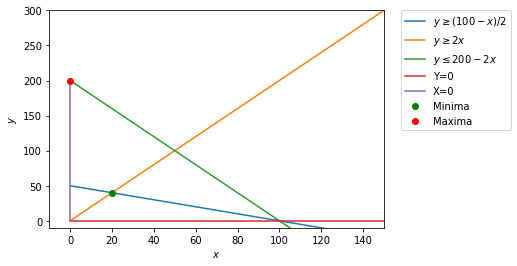

In [52]:
#from coeffs import *
from cvxpy import *
import numpy as np
import matplotlib.pyplot as plt

#Generate line points
def line_gen(A,B):
  len =10
  x_AB = np.zeros((2,len))
  lam_1 = np.linspace(0,1,len)
  for i in range(len):
    temp1 = A + lam_1[i]*(B-A)
    x_AB[:,i]= temp1.T
  return x_AB

  #Intersection of two lines
def line_intersect(n1,c1,n2,c2):
  N=np.vstack((n1,n2))
  p = np.array([c1,c2]) 
  #Intersection
  P=np.linalg.inv(N)@p
#  P=np.linalg.inv(N.T)@p
  return P

A = np.array(( [-1, -2], [2, 1 ],[2,-1])).T
b = np.array([ -100, 200,0 ]).reshape((3,-1))
c = np.array([ 1, 2 ])  #Z

x = Variable((2,1),nonneg=True)
#Maximum function
f = c@x
lp_obj_mx = Maximize(f)
#Constraints
constraints = [A.T@x <= b]

#solution
Problem(lp_obj_mx, constraints).solve()
print("Maximum= ",f.value)

#Minimum function
f = c@x
lp_obj_mn = Minimize(f)
#Constraints
constraints = [A.T@x <= b]

#solution
Problem(lp_obj_mn, constraints).solve()
print("Minimum= ",f.value)

# Construct lines
x = np.array([0, 20, 200])
y1 = []
y2 = []
y3 = []
for i in range(3):
  y1.append((100-x[i])/2.0)  # x + 2y >= 100
  
  y2.append(2*x[i])     # 2X - y <= 0 
  
  y3.append(200 - 2 * x[i])     # 2x + y <=200



# Make plot
plt.plot(x, y1, label=r'$y\geq(100-x)/2$')
plt.plot(x, y2, label=r'$y\geq2x$')
plt.plot(x, y3, label=r'$y\leq 200-2x $')
y4=np.zeros(x.shape)
plt.plot(x,y4,label="Y=0")
plt.plot(y4,x,label="X=0")
plt.plot([20],[40],"go",label="Minima")
plt.plot([0],[200],"ro",label="Maxima")

plt.xlim((-10, 150))
plt.ylim((-10, 300))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
